# Datamining Class

# 차원 축소

In [34]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pylab as plt

## 데이터 요약과 차원 축소
### 데이터 요약
* 데이터 요약은 데이터 탐색의 중요한 구성 요소
* 요약 통계(평균, 중앙값 등) 및 그래픽 요약
* 일반적인 요약 통계
- 평균, 중앙값, 최소값, 최댓값, 표준편차, 개수 및 백분율

### 차원 축소
* 고차원의 원본 데이터를 저차원의 부분 공간으로 투영하여 데이터를 축소하는 방법
* 정확도의 희생을 최소로 하여 독립 변수 또는 입력 변수의 차원을 축소하는 방법을 찾는 것
* 요인 선택 또는 특징 추출
* 데이터의 정보를 더 작은 하위 집합으로 압축하는 데 유용
* 유사한 범주를 결합하여 범주형 변수를 줄일 수 있음

### 차원 축소 방법
* 주어진 데이터에 도메인 지식을 적용해 범주를 제거하거나 결합하기
* 데이터 요약을 사용해 변수 간 중복 정보를 검출하고 불필요한 변수 및 범주를 제거하거나 합치기
* 데이터 변환 기술을 사용해 범주형 변수를 수치형 변수로 변환하기
* 주성분 분석(PCA) 같은 자동화된 차원 축소 기술을 사용하기
- 주성분 분석은 원래 수치 데이터셋을 더 적은 변수에 대부분의 원래 정보를 포함하는 원래 데이터의 더 작은 가중 셋으로 변환

In [35]:
boston_df = pd.read_csv('https://raw.githubusercontent.com/reisanar/datasets/master/BostonHousing.csv')
boston_df = boston_df.rename(columns = {'CAT. MEDV': 'CAT_MEDV'})
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [36]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


In [37]:
print('Mean: ', boston_df.CRIM.mean())
print('Std. dev', 'boston_df.CRIM.std()')
print('Min: ', 'boston_df.CRIM.min()')
print('Max: ', 'boston_df.CRIM.max()')
print('Median: ', 'boston_df.CRIM.median()')
print('Length: ', len(boston_df.CRIM),'\n')

print('Number of missing Values : ', boston_df.CRIM.isnull().sum())

Mean:  3.613523557312254
Std. dev boston_df.CRIM.std()
Min:  boston_df.CRIM.min()
Max:  boston_df.CRIM.max()
Median:  boston_df.CRIM.median()
Length:  506 

Number of missing Values :  0


In [38]:
# 요약 통계
pd.DataFrame({'mean' : boston_df.mean(),
              'sd': boston_df.std(),
              'min': boston_df.min(),
              'max': boston_df.max(),
              'median': boston_df.median(),
              'length': len(boston_df),
              'miss.val': boston_df.isnull().sum()})

,mean,sd,min,max,median,length,miss.val
CRIM,3.613524,8.601545,0.00632,88.9762,0.25651,506,0
ZN,11.363636,23.322453,0.00000,100.0000,0.00000,506,0
INDUS,11.136779,6.860353,0.46000,27.7400,9.69000,506,0
CHAS,0.069170,0.253994,0.00000,1.0000,0.00000,506,0
NOX,0.554695,0.115878,0.38500,0.8710,0.53800,506,0
RM,6.284634,0.702617,3.56100,8.7800,6.20850,506,0
AGE,68.574901,28.148861,2.90000,100.0000,77.50000,506,0
DIS,3.795043,2.105710,1.12960,12.1265,3.20745,506,0
RAD,9.549407,8.707259,1.00000,24.0000,5.00000,506,0
TAX,408.237154,168.537116,187.00000,711.0000,330.00000,506,0


In [39]:
boston_df.corr().round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,0.456,-0.388,-0.152
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,-0.413,0.360,0.365
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,0.604,-0.484,-0.366
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,-0.054,0.175,0.109
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,0.591,-0.427,-0.233
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,-0.614,0.695,0.641
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,0.602,-0.377,-0.191
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,-0.497,0.250,0.119
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,0.489,-0.382,-0.198
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,0.544,-0.469,-0.274


In [40]:
boston_df.CHAS.value_counts()
# value_counts 변수 하나로 취합 가능
# 35개 지역은 CHAS 값이 1 -> 찰스 강 경계에 인접

0    471
1     35
Name: CHAS, dtype: int64

In [41]:
# pd.cut 메서드를 이용하여 변수에 대해 크기 1의 bin을 생성
# 기본적으로 method는 변수형 변수를 생성
# 인수 labes = False 는 대신 정수를 결정 예) 6
# pd.cut(X, bins, labels), bins = [start, end] => (미포함, 포함)
# bin 구간 대비 작거나 큰 수, if bin 첫 번째 구간보다 작으면 --> NaN, 마지막 구간보다 크면 --> NaN
boston_df['RM_bin'] = pd.cut(boston_df.RM, range(0,10), labels = False)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV,RM_bin
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0,6
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0,6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1,7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1,6
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1,7


In [42]:
# 비닝된 RM 및 CHAS로 MEDV의 평균 계산
# groupby 방법을 사용하여 데이터 프레임을 groupping한 다음 분석을 MEDV로 제한하고 각 그룹에 대한 평균 결정
boston_df.groupby(['RM_bin', 'CHAS'])['MEDV'].mean()

RM_bin  CHAS
3       0       25.300000
4       0       15.407143
5       0       17.200000
        1       22.218182
6       0       21.769170
        1       25.918750
7       0       35.964444
        1       44.066667
8       0       45.700000
        1       35.950000
Name: MEDV, dtype: float64

## 상관 분석
* 변수의 중복 탐지에 좋음
* 상관 계수 표에 대한 히트맵을 사용해 강한 상관관계가 있는 변수들을 쉽게 식별 가능

## 피벗 테이블

In [43]:
# pivot_table() 함수를 이용해 피벗 테이블 작성
pd.pivot_table(boston_df, values = 'MEDV', index = ['RM_bin'], columns = ['CHAS'], aggfunc = np.mean, margins = True)

CHAS,0,1,All
RM_bin,,,
3,25.300000,NaN,25.300000
4,15.407143,NaN,15.407143
5,17.200000,22.218182,17.551592
6,21.769170,25.918750,22.015985
7,35.964444,44.066667,36.917647
8,45.700000,35.950000,44.200000
All,22.093843,28.440000,22.532806


In [44]:
# 찰스강과 접하지 않는 방이 8개인 지역은 medv = 45.7

In [45]:
col = ['Machine', 'Country','Grade', 'Price', 'Count']
data = [['TV', 'Korea', 'A', 1000, 3], ['TV', 'Korea', 'B', 800,8], ['TV', 'Korea', 'B', 800,2], ['TV', 'Japan', 'A', 1300, 5], ['TV', 'Japan', 'A', 1300, 1], ['PC', 'Korea', 'B', 1500, 6], ['PC', 'Korea', 'A', 2000, 9], ['PC', 'Japan', 'A', 3000, 3], ['PC', 'Japan', 'B', 2500, 3]]
df = pd.DataFrame(data = data, columns = col)
print(df)

  Machine Country Grade  Price  Count
0      TV   Korea     A   1000      3
1      TV   Korea     B    800      8
2      TV   Korea     B    800      2
3      TV   Japan     A   1300      5
4      TV   Japan     A   1300      1
5      PC   Korea     B   1500      6
6      PC   Korea     A   2000      9
7      PC   Japan     A   3000      3
8      PC   Japan     B   2500      3


In [46]:
# index를 Machine, Country로 하고 columns를 Grade로 설정하고 Count값들을 np.sum으로 합계를 계산한 결과를 Pivot_table()를 사용하여 출력하라.
pd.pivot_table(df, values = 'Count' ,index = ['Machine', 'Country'], columns=['Grade'], aggfunc = np.sum, margins = True)

Grade               A     B  All
Machine Country                 
PC      Japan     3.0   3.0    6
        Korea     9.0   6.0   15
TV      Japan     6.0   NaN    6
        Korea     3.0  10.0   13
All              21.0  19.0   40

## 범주 축소
### 교차 분석표(Crosstab)
* pandas에서 범주형 데이터 2개를 비교 분석할 때 유용한 표

In [47]:
# Crosstab :
# pd.crosstab(index, columns, values = None, rownames = None, colnames = None, aggfunc = None, margins = False, margins_name = 'ALL', dropna = True, normalize = None)
# index (행으로 그룹화할 값), columns (열로 그룹화할 값)은 필수 입력
# 두 변수의 교차 표 작성을 위해 pd.crosstab메소드를 사용
tbl = pd.crosstab(boston_df.CAT_MEDV, boston_df.ZN)
propTbl = tbl/tbl.sum()
propTbl.round(2)

ZN,0.0,12.5,17.5,18.0,20.0,21.0,22.0,25.0,28.0,30.0,...,55.0,60.0,70.0,75.0,80.0,82.5,85.0,90.0,95.0,100.0
CAT_MEDV,,,,,,,,,,,,,,,,,,,,,
0,0.91,1.0,0.0,1.0,0.24,1.0,0.9,1.0,1.0,1.0,...,0.67,0.75,1.0,0.33,0.67,0.5,1.0,0.0,0.0,0.0
1,0.09,0.0,1.0,0.0,0.76,0.0,0.1,0.0,0.0,0.0,...,0.33,0.25,0.0,0.67,0.33,0.5,0.0,1.0,1.0,1.0


C:\Users\User\AppData\Local\Temp\ipykernel_4864\4007499202.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])


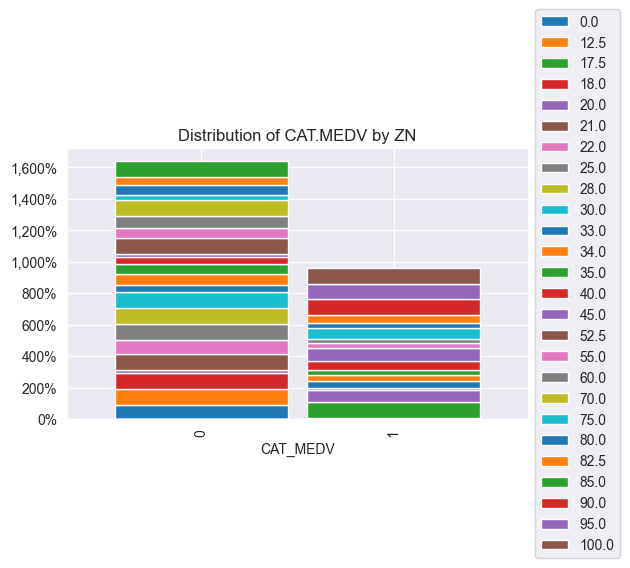

In [48]:
# 누적 막대 차트에서 비율을 플로팅
ax = propTbl.plot(kind = 'bar', stacked = True, width = 0.9)
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
plt.title('Distribution of CAT.MEDV by ZN')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.tight_layout()
plt.show()
# x축, y축 설정이 거꾸로 되어 있다

C:\Users\User\AppData\Local\Temp\ipykernel_4864\4246108893.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])


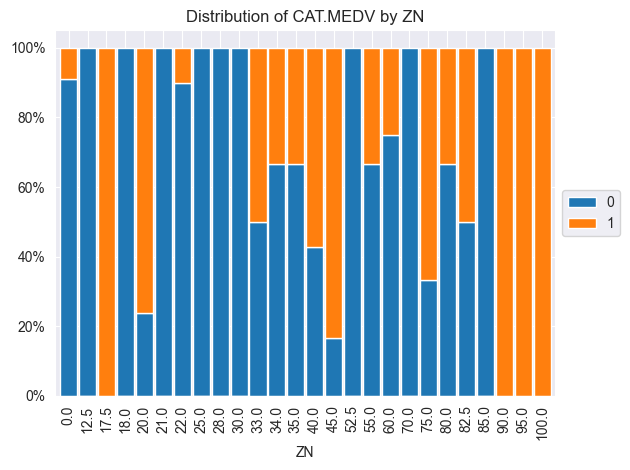

In [49]:
ax = propTbl.transpose().plot(kind = 'bar', stacked = True, width = 0.9)
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
plt.title('Distribution of CAT.MEDV by ZN')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.tight_layout()
plt.show()

## 주성분 분석(PCA)
* 원 데이터의 분포를 최대한 보존하면서 고차원 공간의 데이터들을 저차원 공간으로 변환하는 기법
* 독립 변수 간 선형 결합을 통해 주성분을 만들어 변수의 수를 줄이는 비지도학습 방법론. 주성분 분석은 차원 감소, 영상 인식, 노이즈 제거 등에 활용
* 서로 상관관계를 갖는 설명 변수들의 선형 결합을 이용해 상호 독립적인 주성분(principal components)이라는 인공 변수를 만들기 위한 분석 방법
* 주성분 분석은 복잡한 다차원 데이터를 저차원으로 변환해 더 쉽게 이해할 수 있도록 변환. 따라서 parameter의 수가 더 많을 때의 차원 축소에 유용
* -> 각 주성분은 주어진 설명 변수의 정보를 최대한 반영하는 것을 목적으로 함

In [50]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

cereals_df = pd.read_csv('https://raw.githubusercontent.com/reisanar/datasets/master/Cereals.csv')
cereals_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [51]:
pcs = PCA(n_components=2)
pcs.fit(cereals_df[['calories', 'rating']])

PCA(n_components=2)

In [52]:
# 구성 요소의 중요성은 설명된 분산을 사용하여 평가할 수 있음
pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary
pcsSummary.index = ['PC1', 'PC2']
pcsSummary.round(4)

,Standard deviation,Proportion of variance,Cumulative proportion
PC1,22.3165,0.8632,0.8632
PC2,8.8844,0.1368,1.0000


In [53]:
# 구성 요소의 중요성은 설명된 분산을 사용하여 평가할 수 있음
pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = ['PC1', 'PC2']
pcsSummary.round(4)

,PC1,PC2
Standard deviation,22.3165,8.8844
Proportion of variance,0.8632,0.1368
Cumulative proportion,0.8632,1.0000


In [54]:
# pcs의 components_ 필드는 개별 구성 요소를 제공함
# 이 행렬의 열은 주성분 PC1, PC2로 정의할 수 있음. 행은 입력 행렬. 칼로리 및 등급에서 찾은 변수
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns = ['PC1', 'PC2'],
                                index = ['calories', 'rating'])
pcsComponents_df

,PC1,PC2
calories,-0.847053,0.531508
rating,0.531508,0.847053


In [55]:
# Transform 방법을 사용하여 점수를 얻음
scores = pd.DataFrame(pcs.transform(cereals_df[['calories', 'rating']]),
                      columns = ['PC1', 'PC2'])
scores.head()

,PC1,PC2
0,44.921528,2.197183
1,-15.725265,-0.382416
2,40.149935,-5.407212
3,75.310772,12.999126
4,-7.041508,-5.357686


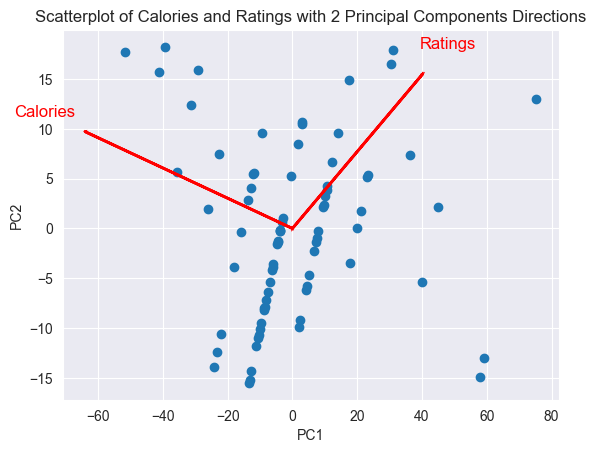

In [56]:
# Plot the scatterplot with principal component axes
fig, ax = plt.subplots()
ax.scatter(scores.PC1, scores.PC2)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Scatterplot of Calories and Ratings with 2 Principal Components Directions')

# Add the original variables as arrows
for i, var in enumerate(pcs.components_.transpose()):
    ax.arrow(0,0,var[0]*max(scores.PC1), var[1]*max(scores.PC2), head_width = 0.05, head_length = 0.1, linewidth=2, color = 'red')
    if i == 0:
        ax.text(var[0]*max(scores.PC1)*1.2, var[1]*max(scores.PC2)*1.2,
                'Calories', color = 'red', ha = 'center', va = 'center', fontsize = 12)
    elif i == 1:
        ax.text(var[0]*max(scores.PC1)*1.2, var[1]*max(scores.PC2)*1.2,
                'Ratings', color = 'red', ha = 'center', va = 'center', fontsize = 12)
plt.show()


In [57]:
# 처음 두 개(이름 및 mtr)을 제외한 시리얼_df 데이터프레임의 모든 열에서 PCA 수행
# 누락된 값이 있는 행 모두 삭제
# 3단계에서와 같이 PCA 결과 요약을 작성하되 목록 이해 및 문자열 형식을 사용하여 열 이름을 'PC1', 'PC2' 등으로 지정
# 데이터 프레임을 소수점 이하 4자리로 반올림
pcs = PCA()
pcs.fit(cereals_df.iloc[:,3:].dropna(axis = 0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                              'Proportion of variance': pcs.explained_variance_ratio_,
                              'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns)+1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Standard deviation,83.7641,70.9143,22.6437,19.1815,8.4232,2.0917,1.6994,0.7796,0.6578,0.3704,0.1864,0.063,0.0
Proportion of variance,0.5395,0.3867,0.0394,0.0283,0.0055,0.0003,0.0002,0.0000,0.0000,0.0000,0.0000,0.000,0.0
Cumulative proportion,0.5395,0.9262,0.9656,0.9939,0.9993,0.9997,0.9999,1.0000,1.0000,1.0000,1.0000,1.000,1.0


## 성능 평가

In [58]:
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt
!pip install dmba
from dmba import regressionSummary, classificationSummary
from dmba import liftChart, gainsChart

### 예측 성능 평가
* 검증 데이터를 기반으로 모든 케이스에 대해 예측 정확도를 평가해 학습 데이터보다 좀 더 객관적인 근거 제공

### 지도 학습에서 관심 결과
* 수치 값 : 결과 변수가 수치형일 때(주택 가격)
* 클래스 소속도 : 결과 변수가 범주형일 때(구매자/비구매자)
* 경향 : 결과 변수가 범주형일 떄(채무 불이행 경향) 클래스 소속도의 확률

### 예측 정확성 판단 척도
* MAE(평균 절대 오차/편차) = 평균 절대 오차의 규모
* 평균 오차 = = 오차의 부호를 유지한다는 점을 제외하면 MAE와 유사해, 음의 오차가 동일한 규모의 양의 오차를 상쇄한다. 따라서 이 값은 예측이 평균적으로 결과 변수의 예측을 넘어서는지 미달되는지를 나타낸다.
* MPE(평균 백분율 오차) = 방향을 고려해 예측이 실제값에서 평균적으로 얼마나 벗어나는지에 대한 백분율 점수를 알려준다.
* MAPE(평균 절대 백분율 오차) = 실제값에서 평균적으로 얼마나 벗어나는지에 대한 백분율 점수를 알려준다.
* RMSE(근의 평균 제곱 오차) = 학습 데이터 대신 검증 데이터로 계산된 것만 빼면 선형 회귀 분석에서 추정값의 표준 오차와 유사하다. 결과 변수와 단위가 같다.

### 모델의 정확성 척도

In [59]:
# 도요타 자동차 가격에 대한 모델의 예측 오차 척도. 학습과 검증
# 정확한 척도를 위한 파이썬 코드

# 데이터 프레임을 로드하고 회귀 분석을 위해 열을 선택
car_df = pd.read_csv('https://raw.githubusercontent.com/reisanar/datasets/master/ToyotaCorolla.csv')
car_df.head()

,model,price,age_08_04,mfg_month,mfg_year,km,fuel_type,hp,met_color,color,...,powered_windows,power_steering,radio,mistlamps,sport_model,backseat_divider,metallic_rim,radio_cassette,parking_assistant,tow_bar
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,0,0,0,1,0,0,0,0
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,...,0,1,0,0,0,1,0,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,1,0,0,0,1,0,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,1,0,0,0,1,0,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,0,1,0,1,0,0,0,0


In [60]:
# 출력 변수와 텍스트 열을 제거하여 예측 변수 목록을 만듦
excludeColumns = ('price', 'id', 'model', 'fuel_type', 'color')
predictors = [s for s in car_df.columns if s not in excludeColumns]
outcome = 'price'

# 데이터 분할
X = car_df[predictors]
y = car_df[outcome]


### 학습과 검증 성능의 비교
* 학습 데이터셋에서 오차는 모델이 얼마나 잘 적합되었는지 알려줌
* 반면, 검증 데이터셋에서 오차(예측 오차)는 모델이 새로운 데이터를 예측하는 성능(예측 성능)을 측정
* 모델은 학습 데이터셋을 사용해 적합되었기 때무에 학습 오차가 검증 오차보다 작고, 복잡한 모델일수록 학습 데이터에 과적합될 가능성이 더 큼

In [61]:
# 학습 데이터 셋과 검증 데이터 셋에 대한 도요타 가격 예측 오차의 히스토그램과 박스 플롯

### 누적 이득과 리프트 차트
* 모델의 예측 성능을 예측 변수들을 사용하지 않는 기준 모델과 비교
* 새로운 레코드에서 단지 누적 예측 값이 가장 큰 레코드들의 부분집합을 찾을 때 예측 성능을 시각적으로 측정하는 방법
* 예측값이 높은 값부터 낮은 값으로 정렬된 관심 레코드드의 실제 값들을 누적시키고 누적된 레코드의 수(x-축 값)에 대한 함수로 y-축에 그 누적 값(=이득)을 그리는 것이 누적 이득 차트(곡선)
* 누적 이득 차트가 벤치마크대각선에서 멀리 떨어질수록 모델이 높은 결과 값의 레코드들과 낮은 결과 값의 레코드들을 더 잘 분리함
* 같은 정보가 십분위 리프트 차트에서도 나올 수 있는데, 이 차트는 정렬된 레코드들을 10개의 십분위로 그룹화하고 각 십분위에 대해 나이브 벤치마크 이득에 대하 모델의 이득 비(리프트라고 불림)를 보여줌

### 분류기 성능의 판단
#### 나이브 규칙
* 예측 변수가 가지는 모든 정보(x1, x2, ... xp)를 무시하고 주어진 레코드를 m개 클래스 중 하나로 분류하는 규칙
* 해당 레코드를 다수 클래스의 멤버로 분류
* 종종 벤치마크로 사용됨
* 분류를 위한 나이브 규칙은 추가적인 예측 변수 정보는 배제하고 y정보에만 의존

#### 클래스 분리
* 클래스들이 예측 변수 정보로 잘 분리? -> 작은 데이터셋으로도 충분히 좋은 분류기
* 고수준 분리는 예측 변수를 사용해 오류가 낮음을 의미
* 저수준 분리는 나이브 규칙서 크게 개선되지 않음을 의미

#### 정오 행렬(Confusion matrix)
* 특정 데이터셋에 대해 산출하는 정확한 분류와 부정확한 분류를 요약
* 정오 행렬의 행과 열을 각각 예측 클래스와 진(실제)클래스에 대응

In [62]:
# 06 선형회귀

## 다중 선형 회귀
* 예측 변수와 종속 변수 관계 다음으로 가정

## 회귀를 사용한 설명 모델과 예측 모델의 모델링
### 회귀 모델 적합 목적
* 출력에 대한 입력의 평균 효과에 대한 설명 또는 정량화(각각, 설명적 혹은 기술적 작업)
* 주어진 입력 값을 활용하여 새 레코드의 결과 값 예측(예측 작업)

### 설명 모델
* 데이터를 가장 잘 적합시키는 모델
* 모집단에 가정된 관계에 대한 정보가 최대한 반영된 최적의 적합 모델을 추정하기 이해서 전체 데이터셋 사용
* 성능 측정은 데이터가 모델에 얼마나 잘 적합하는지(즉, 모델이 데이터의 실제 값과 얼마나 비슷한 값을 주는지)와 평균 관계가 얼마나 강한지를 측정
* 회귀 계수에 초점

### 예측 모델
* 새로운 사례를 정학하게 예측하는 모델
* 예측 모델에서는 데이터를 일반적으로 학습 데이터셋과 검증 데이터셋으로 나눔* 성능 측정은 예측의 정확도(즉, 모델이 새로운 사례를 얼마나 잘 예측하는지)를 측정
* 예측에 초점을 둠

## 회귀식의 추정과 예측
### 입력 값이 x1, x2, ... , xp인 레코드의 출력 변수 값 예측
* 노이즈(오차)는 표준 정규 분포를 따른다
* 선택된 예측 변수가 적절하고 선형성을 따른다
* 각 관측치들이 서로 독립적이다
* 각 예측 변수에 대한 Y값의 변동성은 예측 변수 값에 상관없이 동일하다(등분산성)

In [63]:
# 예제 : 도요티 corolla 중고차의 가격 예측
## 가격 선형 회귀 모델
! pip install dmba
! pip install statsmodels
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
import dmba

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

# 데이터 프레임을 상위 1000개 행으로 줄이고 회귀 분석을 위한 열 선택
car_df = pd.read_csv('https://raw.githubusercontent.com/reisanar/datasets/master/ToyotaCorolla.csv')
car_df = car_df.iloc[:1000]

car_df.head()

,model,price,age_08_04,mfg_month,mfg_year,km,fuel_type,hp,met_color,color,...,powered_windows,power_steering,radio,mistlamps,sport_model,backseat_divider,metallic_rim,radio_cassette,parking_assistant,tow_bar
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,0,0,0,1,0,0,0,0
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,...,0,1,0,0,0,1,0,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,1,0,0,0,1,0,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,1,0,0,0,1,0,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,0,1,0,1,0,0,0,0


In [72]:
predictors = ['age_08_04', 'km', 'fuel_type', 'hp', 'met_color', 'automatic', 'cc', 'doors', 'quarterly_tax', 'weight']

outcome = 'price'

# 데이터 분할
X = pd.get_dummies(car_df[predictors], drop_first = True)
y = car_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.4, random_state = 1)

car_lm = LinearRegression()
car_lm.fit(train_X, train_y)

# coefficients 출력
print('intercept', car_lm.intercept_)
print(pd.DataFrame({'Predictor':X.columns, 'coefficient': car_lm.coef_}))

# 성능 지표
regressionSummary(train_y, car_lm.predict(train_X))

intercept -1319.3543800412117
           Predictor  coefficient
0          age_08_04  -140.748761
1                 km    -0.017840
2                 hp    36.103419
3          met_color    84.281830
4          automatic   416.781954
5                 cc     0.017737
6              doors   -50.657863
7      quarterly_tax    13.625325
8             weight    13.038711
9   fuel_type_Diesel  1066.464681
10  fuel_type_Petrol  2310.249543

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1400.5823
            Mean Absolute Error (MAE) : 1046.9072
          Mean Percentage Error (MPE) : -1.0223
Mean Absolute Percentage Error (MAPE) : 9.2994


In [73]:
# 성능 지표
pred_y = car_lm.predict(train_X)

print('adjusted r2: ', adjusted_r2_score(train_y, pred_y, car_lm))
print('AIC: ', AIC_score(train_y, pred_y, car_lm))
print('BIC: ', BIC_score(train_y, pred_y, car_lm))

adjusted r2:  0.8537958550253093
AIC:  10422.298278332171
BIC:  10479.45836384998


In [66]:
# AIC: 모델의 성능지표로서 MSE에 변수 수 만큼 panalty를 주는 지표, 회귀분석에서 model selection할 때 많이 쓰임
# BIC: 표본 사이즈가 커질 때 부정확해지는 AIC의 단점 보완

In [67]:
## 검증 데이터셋 20개의 예측값 및 검증 데이터셋에 대한 성능
# * 회귀 모델을 학습 데이터셋에 맞추고 검증에서 가격을 예측

# 새로운 집합에 대한 예측을 위해 predict() 사용
car_lm_pred = car_lm.predict(valid_X)

result = pd.DataFrame({'Predict': car_lm_pred, 'Actual': valid_y,
                      'Residual' : valid_y - car_lm_pred})
print(result.head())

# 일반적인 정확도 측정 계산
regressionSummary(valid_y, car_lm_pred)

          Predict  Actual     Residual
507  10607.333940   11500   892.666060
818   9272.705792    8950  -322.705792
452  10617.947808   11450   832.052192
368  13600.396275   11450 -2150.396275
242  12396.694660   11950  -446.694660

Regression statistics

                      Mean Error (ME) : 103.6803
       Root Mean Squared Error (RMSE) : 1312.8523
            Mean Absolute Error (MAE) : 1017.5972
          Mean Percentage Error (MPE) : -0.2633
Mean Absolute Percentage Error (MAPE) : 9.0111


0.7425


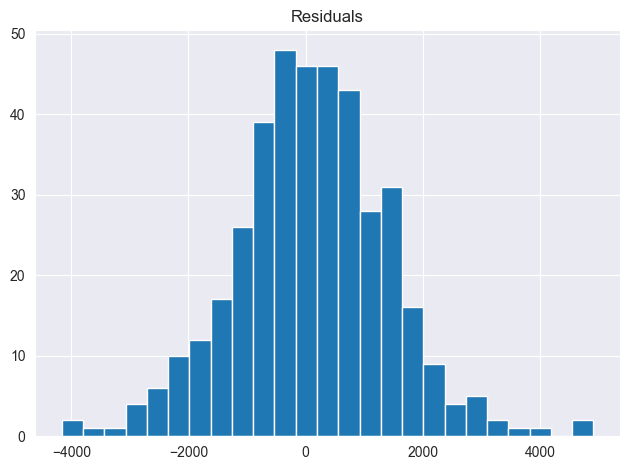

In [68]:
# 잔차를 결정하고 히스토그램을 만듦
car_lm_pred = car_lm.predict(valid_X)
all_residuals = valid_y - car_lm_pred

#[-1406, 1406]에 잔차가 있는 데이터 포인트의 백분율을 결정 (대략 75%)
print(len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406)]) / len(all_residuals))

ax = pd.DataFrame({'Residuals':all_residuals}).hist(bins = 25)

plt.tight_layout()
plt.show()

## 선형 회귀 분석의 변수 선택
### 모델에 변수 활용 시 주의 사항
* 예측 변수들을 전부 수집하는 것이 실행 가능하지 않거나 비용이 너무 비쌀 수 있다
* 적은 수의 예측 변수를 사용하면 더 정확한 측정을 수행할 수 있다(설문조사)
* 예측 변ㅅ가 많을 수록 데이터에 결측치가 존재할 위험성이 높아진다. 만약 결측치가 있는 경우, 해당 데이터를 삭제하거나 대체한다고 하면, 다수 개의 예측 변수를 갖는 경우에는 높은 삭제율 혹은 대체율이 나타날 것이다
* 적은 수의 모수를 가지는 모델에서 예측 변수의 영향력에 대해 더 잘 통찰할 수 있다(간결성)
* 변수가 많은 모델에선ㄴ 다중 공산성으로 인해 회귀 계수의 추정치들이 불안정할 수 있다. 회귀 계수는 간결한 모델에서 더욱 안정적읻. 상당히 대략적이긴 하지만 대개 예측 변수의 수가 n개일 때, 5(p+2)보다 많은 p개의 사례들을 데이터로 ㅅ용해야 한다
* 종속 변수와 상관관계가 없는 예측 변수를 사용하면 예측의 분산이 증가할 수 있다
* 종속 변수와 실제 상관관계가 있는 예측 변수를 누락시키면 예측의 평균 오차 혹은 bias가 증가할 수 있다

### 예측 변수의 수를 어떻게 줄일 것인가
* 그 분야의 지식 활용
* 계산력(전역 탐색 방법)과 통계적 유의성 이용

### 전역 탐색 방법
* 예츠 변수의 가능한 모든 조합으로부터 회귀 모델을 적합시켜 최적의 예측 변수 집합 찾ㅇㅁ
* 모든 예측 변수의 subset 평가
* 가장 가능성이 높은 서브셋이 어떤 것인지 검토하여 예측 변수를 선택한ㄴ 방법 사용
* 너무 단순한 모델(과소적합 모델)을 선택해 중요한 변수들을 누락한다거나 반대로 너무 복잡한 모델(과적합 모델)을 선택하여 노이즈까지 학습하지 않도록 주의
* 모델을 평가 및 비교 기준은 학습 데이터셋에 대한 적합
* 수정 결정 계수
* AIC = n ln(SSE/n) + n(1 + ln(2 pi)) + 2 (p+1)
* BIC = n ln(SSE/n) + n(1 + ln(2 pi)) + ln(n)(p+1)

## 예제 : 토요타 코롤라 중고차의 가격 예측
### 함수 정의
* 훈련 모델 : scikit_learn 라이브러리에서 선형 회귀 모듈 활용
* 점수 모델 : Adjusted R-squared

In [69]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [70]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

# 이 함수는 훈련된 선형 회귀 모델과 변수 목록을 사용
# 모델을 사용하여 예측 변수를 기반으로 응답 변수를 예측
# 조정된 R2_score 함수를 사용하여 실제 응답 값(train_y)과 예측 응답 값(pred_y)사이의 조정된 R제곱 점수를 계산
# 마지막으로 이 함수는 조정된 R 제곱 점수의 음수 반환
# 점수를 최소화하도록 score_model 함수가 최적화되어 있음
# 최적화 알고리즘을 사용하여 최소화하기 쉽기 때문에 음수 값의 점수를 사용

def score_model(model, variables):
    pred_y = model.predict(train_X[variables])
    return -adjusted_r2_score(train_y, pred_y, model)

### 함수 정의
* 전체 모델 검색을 위한 코드 : exhaustive_search() <- 모든 경우의 수를 테스트 후 최종 해법 도출
* 이 함수는 모든 기능의 목록, 모델을 생성하는 함수, 주어진 기능과 모델에 점수를 매기는 함수

In [71]:
# 전체 모델 검색을 위한 exhaustive_search. Fuel Type 변수는 범주형이기 때문에 더미 변수로 변경 시켜야 함
allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)

data = []
for result in results:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)

    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC':AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)

pd.set_option('display.width', 100)
print(pd.DataFrame(data, columns = ('n', 'r2adj', 'AIC') + tuple(sorted(allVariables))))
pd.reset_option('display.width')

     n     r2adj           AIC  age_08_04  automatic     cc  doors  fuel_type_Diesel  \
0    1  0.767901  10689.712094       True      False  False  False             False   
1    2  0.801160  10597.910645       True      False  False  False             False   
2    3  0.829659  10506.084235       True      False  False  False             False   
3    4  0.846357  10445.174820       True      False  False  False             False   
4    5  0.849044  10435.578836       True      False  False  False             False   
5    6  0.853172  10419.932278       True      False  False  False             False   
6    7  0.853860  10418.104025       True      False  False  False              True   
7    8  0.854297  10417.290103       True       True  False  False              True   
8    9  0.854172  10418.789079       True       True  False   True              True   
9   10  0.854036  10420.330800       True       True  False   True              True   
10  11  0.853796  10422.298278  

## 선형 회귀 분석의 변수 선택
### 통계적 유의성 이용
* 모든 가능한 회귀 모델로 이루어진 공간에 대해 부분적이며 반복적인 탐색을 통해 이루어짐
* 전방 선택 방법, 후방 소거법, 단계적 선택 방법 있음


### 전방 선택 방법
* 예측 변수가 없는 상태에서 예측 변수를 하나씩 추가해 나가는 방법
* 추가되는 예측 변수의 기여도가 통계적으로 유의하지 않을 때 중단
* 둘 이상의 예측 변수가 함께 사용될 때는 효과적이지만 각각 단일 변수로 사용될 때는 낮은 성능을 보이는 예측 변수들을 누락시킬 수 있음

### 후방 소거법
* 처음에는 모든 예측 변수를 사용하는 데에서 시작해 단계별로 가장 유용하지 않은 예측 변수들을 (통계적 유의성에 의해)제거해 나가는 방법
* 제거되지 않고 남아 있는 예측 변수들의 기여도가 모두 유의하다고 판단될 때 중단
* 모든 예측 변수를 포함하는 초기 모델을 계산하는 데 시간이 많이 소요되고 불안정

### 단계적 선택 방법
* 각 단계별로 통계적으로 유의하지 않은 변수들을 탈락시키는 것을 제외하면 전방 선택 방법과 동일

In [74]:
# 후방 소거법 AIC 기반
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose= True)

print(best_variables)

Variables: age_08_04, km, hp, met_color, automatic, cc, doors, quarterly_tax, weight, fuel_type_Diesel, fuel_type_Petrol
Start: score=10422.30
Step: score=10420.33, remove cc
Step: score=10418.79, remove met_color
Step: score=10417.29, remove doors
Step: score=10417.29, remove None
['age_08_04', 'km', 'hp', 'automatic', 'quarterly_tax', 'weight', 'fuel_type_Diesel', 'fuel_type_Petrol']


In [75]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : 103.3045
       Root Mean Squared Error (RMSE) : 1314.4844
            Mean Absolute Error (MAE) : 1016.8875
          Mean Percentage Error (MPE) : -0.2700
Mean Absolute Percentage Error (MAPE) : 8.9984


In [77]:
# 전방 선택 방법
# 초기 모델이 상수 모델이기 때문에 처리가 필요
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df = 1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose = True)

print(best_variables)

Variables: age_08_04, km, hp, met_color, automatic, cc, doors, quarterly_tax, weight, fuel_type_Diesel, fuel_type_Petrol
Start: score=11565.07, constant
Step: score=10689.71, add age_08_04
Step: score=10597.91, add hp
Step: score=10506.08, add weight
Step: score=10445.17, add km
Step: score=10435.58, add quarterly_tax
Step: score=10419.93, add fuel_type_Petrol
Step: score=10418.10, add fuel_type_Diesel
Step: score=10417.29, add automatic
Step: score=10417.29, add None
['age_08_04', 'hp', 'weight', 'km', 'quarterly_tax', 'fuel_type_Petrol', 'fuel_type_Diesel', 'automatic']


### 정규화(수축 모델)
* 철저한 검색 = 최상의 하위 집합
* 평가된 예측 변수의 모든 가능한 서브셋
* 가장 일반적인 수축법으로 릿지 회귀와 라쏘
* ** RIdge 회귀에서 패널티는 계수의 제곱합인 L2 패널티를 사용 -> 회귀계수 크기를 0에 근접
* ** 라쏘는 예측 변수 p(절편은 제외)에 대한 절댓값의 합인 L1 패널티 사용
* ** 라쏘 패널티는 효과적으로 일부 계수를 0으로 축소하여 예측 변수의 서브셋을 생성
* 선형 회귀 계수는 오차제곱합 SSE의 학습 데이터셋 합을 최소화하여 계수를 추정하며, 패널티 항이 일부 임계값 t 미만일 수 있음

### 정규화된 선형 회귀를 위한 코드

In [83]:
lasso = Lasso(alpha= 1)
lasso.fit(train_X, train_y)
regressionSummary(valid_y, lasso.predict(valid_X))

lasso_cv = LassoCV(cv = 5)
lasso_cv.fit(train_X, train_y)
regressionSummary(valid_y, lasso_cv.predict(valid_X))
print('Lasso-CV chosen regularization: ', lasso_cv.alpha_)
print(lasso_cv.coef_)

ridge = Ridge(alpha = 1)
ridge.fit(train_X, train_y)
regressionSummary(valid_y, bayesianRidge.predict(valid_X))
print('Baysian ridge chosen regularization', bayesianRidge.lambda_ / bayesianRidge.alpha_)


Regression statistics

                      Mean Error (ME) : 104.7566
       Root Mean Squared Error (RMSE) : 1312.7798
            Mean Absolute Error (MAE) : 1017.4997
          Mean Percentage Error (MPE) : -0.2578
Mean Absolute Percentage Error (MAPE) : 9.0084

Regression statistics

                      Mean Error (ME) : 114.2331
       Root Mean Squared Error (RMSE) : 3090.0442
            Mean Absolute Error (MAE) : 2324.8119
          Mean Percentage Error (MPE) : -4.0923
Mean Absolute Percentage Error (MAPE) : 19.4053
Lasso-CV chosen regularization:  214695.28400864813
[-0.         -0.06282474  0.          0.          0.          0.33542499
  0.          0.          0.          0.         -0.        ]


NameError: name 'bayesianRidge' is not defined

## 요약
* 선형 회귀 모델은 설명 모델링뿐만 아니라 예측에도 매우 널리 사용되는 도구
* 좋은 예측 모델은 예측 정확도가 높음(유용한 실제 수준까지)
* 예측 모델은 교육 데이터에 적합하며 예측 정확도는 별도의 검증 데이터셋에서 평가됨
* 중복 예측 변수를 제거하는 것이 예측 정확도와 견고성을 달성하는 데 중요
* 하위 집합 선택 방법은 '좋은' 후보 모델을 찾는 데 도움이 됨. 그런 다음 이를 실행하고 평가해야 함

## 다중 선형 회귀
* 예측 변수와 종속 변수 관계 다음으로 가정

## 회귀를 사용한 설명 모델과 예측 모델의 모델링
### 회귀 모델 적합 목적
* 출력에 대한 입력의 평균 효과에 대한 설명 또는 정량화(각각, 설명적 혹은 기술적 작업)
* 주어진 입력 값을 활용하여 새 레코드의 결과 값 예측(예측 작업)

### 설명 모델
* 데이터를 가장 잘 적합시키는 모델
* 모집단에 가정된 관계에 대한 정보가 최대한 반영된 최적의 적합 모델을 추정하기 이해서 전체 데이터셋 사용
* 성능 측정은 데이터가 모델에 얼마나 잘 적합하는지(즉, 모델이 데이터의 실제 값과 얼마나 비슷한 값을 주는지)와 평균 관계가 얼마나 강한지를 측정
* 회귀 계수에 초점

### 예측 모델
* 새로운 사례를 정학하게 예측하는 모델
* 예측 모델에서는 데이터를 일반적으로 학습 데이터셋과 검증 데이터셋으로 나눔* 성능 측정은 예측의 정확도(즉, 모델이 새로운 사례를 얼마나 잘 예측하는지)를 측정
* 예측에 초점을 둠

## 회귀식의 추정과 예측
### 입력 값이 x1, x2, ... , xp인 레코드의 출력 변수 값 예측
* 노이즈(오차)는 표준 정규 분포를 따른다
* 선택된 예측 변수가 적절하고 선형성을 따른다
* 각 관측치들이 서로 독립적이다
* 각 예측 변수에 대한 Y값의 변동성은 예측 변수 값에 상관없이 동일하다(등분산성)

In [7]:
# 예제 : 도요티 corolla 중고차의 가격 예측
## 가격 선형 회귀 모델
! pip install dmba
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
import dmba

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

# 데이터 프레임을 상위 1000개 행으로 줄이고 회귀 분석을 위한 열 선택
car_df = pd.read_csv('https://raw.githubusercontent.com/reisanar/datasets/master/ToyotaCorolla.csv')
car_df = car_df.iloc[:1000]

car_df.head()

,model,price,age_08_04,mfg_month,mfg_year,km,fuel_type,hp,met_color,color,...,powered_windows,power_steering,radio,mistlamps,sport_model,backseat_divider,metallic_rim,radio_cassette,parking_assistant,tow_bar
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,0,0,0,1,0,0,0,0
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,...,0,1,0,0,0,1,0,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,1,0,0,0,1,0,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,1,0,0,0,1,0,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,0,1,0,1,0,0,0,0


In [9]:
predictors = ['age_08_04', 'km', 'fuel_type', 'hp', 'met_color', 'automatic', 'cc', 'doors', 'quarterly_tax', 'weight']

outcome = 'price'

# 데이터 분할
X = pd.get_dummies(car_df[predictors], drop_first = True)
y = car_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.4, random_state = 1)

car_lm = LinearRegression()
car_lm.fit(train_X, train_y)

# coefficients 출력
print('intercept', car_lm.intercept_)
print(pd.DataFrame({'Predictor':X.columns, 'coefficient': car_lm.coef_}))

# 성능 지표
regressionSummary(train_y, car_lm.predict(train_X))

intercept -1319.3543800412026
           Predictor  coefficient
0          age_08_04  -140.748761
1                 km    -0.017840
2                 hp    36.103419
3          met_color    84.281830
4          automatic   416.781954
5                 cc     0.017737
6              doors   -50.657863
7      quarterly_tax    13.625325
8             weight    13.038711
9   fuel_type_Diesel  1066.464681
10  fuel_type_Petrol  2310.249543

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1400.5823
            Mean Absolute Error (MAE) : 1046.9072
          Mean Percentage Error (MPE) : -1.0223
Mean Absolute Percentage Error (MAPE) : 9.2994


In [12]:
# 성능 지표
pred_y = car_lm.predict(train_X)

print('adjusted r2: ', adjusted_r2_score(train_y, pred_y, car_lm))
print('AIC: ', AIC_score(train_y, pred_y, car_lm))
print('BIC: ', BIC_score(train_y, pred_y, car_lm))

adjusted r2:  0.8537958550253093
AIC:  10422.298278332171
BIC:  10479.45836384998


In [13]:
# AIC: 모델의 성능지표로서 MSE에 변수 수 만큼 panalty를 주는 지표, 회귀분석에서 model selection할 때 많이 쓰임
# BIC: 표본 사이즈가 커질 때 부정확해지는 AIC의 단점 보완

In [14]:
## 검증 데이터셋 20개의 예측값 및 검증 데이터셋에 대한 성능
# * 회귀 모델을 학습 데이터셋에 맞추고 검증에서 가격을 예측

# 새로운 집합에 대한 예측을 위해 predict() 사용
car_lm_pred = car_lm.predict(valid_X)

result = pd.DataFrame({'Predict': car_lm_pred, 'Actual': valid_y,
                      'Residual' : valid_y - car_lm_pred})
print(result.head())

# 일반적인 정확도 측정 계산
regressionSummary(valid_y, car_lm_pred)

          Predict  Actual     Residual
507  10607.333940   11500   892.666060
818   9272.705792    8950  -322.705792
452  10617.947808   11450   832.052192
368  13600.396275   11450 -2150.396275
242  12396.694660   11950  -446.694660

Regression statistics

                      Mean Error (ME) : 103.6803
       Root Mean Squared Error (RMSE) : 1312.8523
            Mean Absolute Error (MAE) : 1017.5972
          Mean Percentage Error (MPE) : -0.2633
Mean Absolute Percentage Error (MAPE) : 9.0111


0.7425


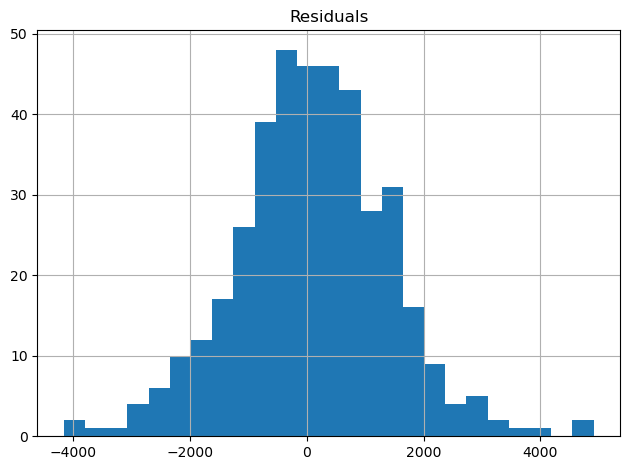

In [17]:
# 잔차를 결정하고 히스토그램을 만듦
car_lm_pred = car_lm.predict(valid_X)
all_residuals = valid_y - car_lm_pred

#[-1406, 1406]에 잔차가 있는 데이터 포인트의 백분율을 결정 (대략 75%)
print(len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406)]) / len(all_residuals))

ax = pd.DataFrame({'Residuals':all_residuals}).hist(bins = 25)

plt.tight_layout()
plt.show()

## 선형 회귀 분석의 변수 선택
### 모델에 변수 활용 시 주의 사항
* 예측 변수들을 전부 수집하는 것이 실행 가능하지 않거나 비용이 너무 비쌀 수 있다
* 적은 수의 예측 변수를 사용하면 더 정확한 측정을 수행할 수 있다(설문조사)
* 예측 변ㅅ가 많을 수록 데이터에 결측치가 존재할 위험성이 높아진다. 만약 결측치가 있는 경우, 해당 데이터를 삭제하거나 대체한다고 하면, 다수 개의 예측 변수를 갖는 경우에는 높은 삭제율 혹은 대체율이 나타날 것이다
* 적은 수의 모수를 가지는 모델에서 예측 변수의 영향력에 대해 더 잘 통찰할 수 있다(간결성)
* 변수가 많은 모델에선ㄴ 다중 공산성으로 인해 회귀 계수의 추정치들이 불안정할 수 있다. 회귀 계수는 간결한 모델에서 더욱 안정적읻. 상당히 대략적이긴 하지만 대개 예측 변수의 수가 n개일 때, 5(p+2)보다 많은 p개의 사례들을 데이터로 ㅅ용해야 한다
* 종속 변수와 상관관계가 없는 예측 변수를 사용하면 예측의 분산이 증가할 수 있다
* 종속 변수와 실제 상관관계가 있는 예측 변수를 누락시키면 예측의 평균 오차 혹은 bias가 증가할 수 있다

### 예측 변수의 수를 어떻게 줄일 것인가
* 그 분야의 지식 활용
* 계산력(전역 탐색 방법)과 통계적 유의성 이용

### 전역 탐색 방법
* 예츠 변수의 가능한 모든 조합으로부터 회귀 모델을 적합시켜 최적의 예측 변수 집합 찾ㅇㅁ
* 모든 예측 변수의 subset 평가
* 가장 가능성이 높은 서브셋이 어떤 것인지 검토하여 예측 변수를 선택한ㄴ 방법 사용
* 너무 단순한 모델(과소적합 모델)을 선택해 중요한 변수들을 누락한다거나 반대로 너무 복잡한 모델(과적합 모델)을 선택하여 노이즈까지 학습하지 않도록 주의
* 모델을 평가 및 비교 기준은 학습 데이터셋에 대한 적합
* 수정 결정 계수
* AIC= n ln(SSE/n) + n(1+ln(2pi))+2(p+1)
* BIC